The following project is an internship task assign by Meriskill to train a model to predict the diabetes of the women as this dataset contains only a data of women. Let's begin by importing required basic libraries :

In [36]:
#Importing Requires Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis & Visualization :

In [37]:
raw_df=pd.read_csv('diabetes.csv')

In [38]:
raw_df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [39]:
raw_df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
440            0      189            104             25        0  34.3   
663            9      145             80             46      130  37.9   
311            0      106             70             37      148  39.4   
244            2      146             76             35      194  38.2   
331            2       87             58             16       52  32.7   
174            2       75             64             24       55  29.7   
553            1       88             62             24       44  29.9   
35             4      103             60             33      192  24.0   
456            1      135             54              0        0  26.7   
529            0      111             65              0        0  24.6   

     DiabetesPedigreeFunction  Age  Outcome  
440                     0.435   41        1  
663                     0.637   40        1  
311                     0.605   22        0  
244                     0.329   29        0  
331                     0.166   25        0  
174                     0.370   33        0  
553                     0.422   23        0  
35                      0.966   33        0  
456                     0.687   62        0  
529                     0.660   31        0

In [40]:
raw_df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
314            7      109             80             31        0  35.9   
123            5      132             80              0        0  26.8   
646            1      167             74             17      144  23.4   
363            4      146             78              0        0  38.5   
751            1      121             78             39       74  39.0   
556            1       97             70             40        0  38.1   
667           10      111             70             27        0  27.5   
324            2      112             75             32        0  35.7   
588            3      176             86             27      156  33.3   
401            6      137             61              0        0  24.2   

     DiabetesPedigreeFunction  Age  Outcome  
314                     1.127   43        1  
123                     0.186   69        0  
646                     0.447   33        1  
363                     0.520   67        1  
751                     0.261   28        0  
556                     0.218   30        0  
667                     0.141   40        1  
324                     0.148   21        0  
588                     1.154   52        1  
401                     0.151   55        0

In [41]:
raw_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
#Checking Null values
raw_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
#Checking Datatypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
#Checking Unique Values In Each Columns
raw_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [45]:
#Checking Range of Age
raw_df['Age'].max(),raw_df['Age'].min()

(81, 21)

In [46]:
#Checking Statisticals Values
raw_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [47]:
!pip install plotly

In [48]:
#Importing Plotly & Setting Grid
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [49]:
px.histogram(raw_df,x="Age",title='Age Vs Diabetes',color='Outcome')

From the above plot, we can draw a conclusion that with increase in age the diabetes also increases. Since,from age 21 to 30 we have more data and less number of diabetes, but after 30 age we have less data and more diabetes.

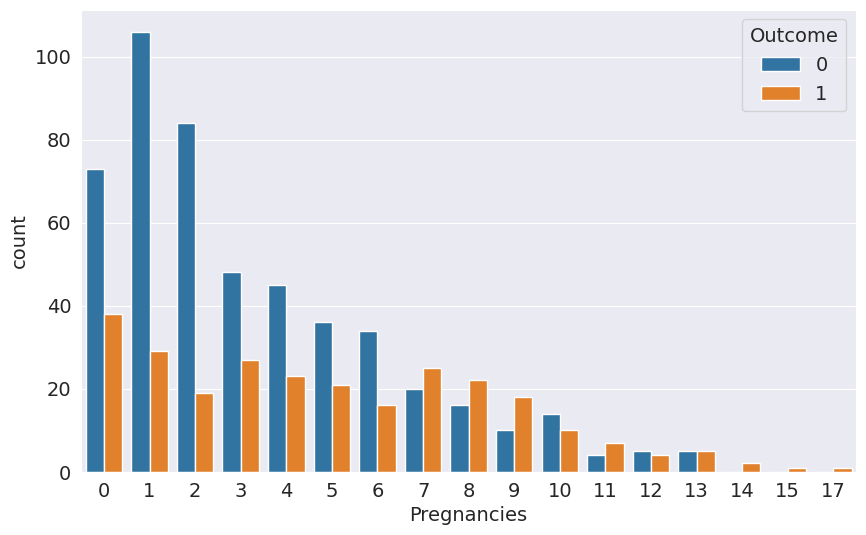

In [50]:
sns.countplot(x='Pregnancies',hue="Outcome",data=raw_df);

Here, from the bar plot the distribution of diabetes with pregnancies is not showing any trends or some trends which shows that with increase in pregnancies diabetes also increases is may be due to the factor of age because to have more childs the age must also be considerable as a general rule. Therefore,To verify above theory,let's plot some realtionships between Pregnancies,Age and diabetes.

In [51]:
px.histogram(raw_df,x='Age',title='Age & Pregnancies',color='Pregnancies')

Performing an experiment,unselect all the pregnancies label see the realtion between pregnancies and age and you will find that our above theory is right.

In [52]:
raw_df['Outcome']=raw_df['Outcome'].astype(bool)
px.scatter(raw_df,x="Age",y='Pregnancies',color='Outcome')

From above scatter plot, It becomes clear that number of pregnancies is not effecting the diabetes by considerable amount. Here, the trends we observe in the bar plots are due to the age and are not because of number of pregnancies.

In [53]:
px.histogram(raw_df,x="BMI",title='BMI Vs Diabetes',color='Outcome')

From the above plot, we can draw a conclusion that with increase in BMI, the diabetes also increases. Since, after 35 BMI value we have more diabatic women and less data as compared to the before 35 BMI.

In [54]:
px.histogram(raw_df,x="DiabetesPedigreeFunction",title='DiabetesPedigreeFunction Vs Diabetes',color='Outcome')


The above plot clearly shows that with increase in Diabetes Pedigree Function, diabetes also increases. This conclusion also match with the Biological Statement that diabetes is a genetic disease.

In [55]:
px.scatter(raw_df,x="Glucose",y='Insulin',color='Outcome',title="Insulin & Glucose Relation with Diabetes")

From above observation,We can conclude that with high glucose level diabetes increases and with high insulin level diabetes Decreases. In other words, Insulin is inversely propotional to Diabetes while Glucose is durectly proportional to the diabetes.

In [56]:
px.histogram(raw_df,x="BloodPressure",title='Blood Pressure Vs Diabetes',color='Outcome')

From above plot, we can say that Blood Pressure is weakly related to a diabetes with high blood pressure more diabetes.

In [57]:
px.scatter(raw_df,x="Age",y='BloodPressure',color='Outcome')

Here, from scatter plot we can say that here the age is not the fact as like in case of pregnancies.

In [58]:
px.histogram(raw_df,x="SkinThickness",title='Skin Thickness Vs Diabetes',color='Outcome')

From above plot, we can say that thickness is weakly related to a diabetes more with thicker skin more diabetes. But it also takes long duratuion for diabetes to make skin thicker.Hence, we can avoid this in our training of model.

##Model Preparation :

In [59]:
!pip install scikit-learn --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [60]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

In [61]:
#Spliting The Data :
train_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=1)

In [62]:
print(f"Train_df.shape : {train_df.shape}")
print(f"Test_df.shape : {test_df.shape}")

Train_df.shape : (614, 9)
Test_df.shape : (154, 9)


In [63]:
#Reconverting Outcome to int64
raw_df['Outcome']=raw_df['Outcome'].astype(int)

In [64]:
raw_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
#Identifying Inputs & Target :
input_cols=['Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
target_cols='Outcome'

In [66]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [67]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

**Scalling :** It helps to avoid mathematical loss.

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler=MinMaxScaler()

In [70]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [71]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [72]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

###Logistic Regression :

In [73]:
#Logistic Regression :
from sklearn.linear_model import LogisticRegression

In [74]:
log_model=LogisticRegression()

In [75]:
log_model.fit(train_inputs,train_targets)

LogisticRegression()

In [76]:
X_train=train_inputs
X_test=test_inputs

In [77]:
log_train_pred=log_model.predict(X_train)
log_train_pred

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False,

In [78]:
log_train_pred

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False,

In [79]:
log_train_probs=log_model.predict_proba(X_train)
log_train_probs

array([[0.43670246, 0.56329754],
       [0.50772453, 0.49227547],
       [0.69813066, 0.30186934],
       ...,
       [0.50833932, 0.49166068],
       [0.33042216, 0.66957784],
       [0.6902239 , 0.3097761 ]])

In [80]:
log_model.classes_

array([False,  True])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(train_targets,log_train_pred)

0.760586319218241

In [83]:
#Test
log_test_pred=log_model.predict(X_test)
log_test_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [84]:
accuracy_score(test_targets,log_test_pred)

0.7792207792207793

In [85]:
log_train_acc,log_test_acc=accuracy_score(train_targets,log_train_pred),accuracy_score(test_targets,log_test_pred)

###Random Forest :

In [86]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [87]:
For_model=RandomForestClassifier(n_jobs=-1,random_state=1)

In [88]:
%%time
For_model.fit(X_train,train_targets)

CPU times: user 321 ms, sys: 21 ms, total: 342 ms
Wall time: 343 ms


RandomForestClassifier(n_jobs=-1, random_state=1)

In [89]:
For_model.score(X_train,train_targets)

1.0

In [90]:
For_model.score(X_test,test_targets)

0.8246753246753247

In [91]:
For_model=RandomForestClassifier(n_jobs=-1,random_state=1,n_estimators=500,max_depth=15,max_leaf_nodes=50)

In [92]:
%%time
For_model.fit(X_train,train_targets)

CPU times: user 1.37 s, sys: 109 ms, total: 1.48 s
Wall time: 1.28 s


RandomForestClassifier(max_depth=15, max_leaf_nodes=50, n_estimators=500,
                       n_jobs=-1, random_state=1)

In [93]:
For_model.score(X_train,train_targets),For_model.score(X_test,test_targets)

(0.9495114006514658, 0.8051948051948052)

In [94]:
For_model=RandomForestClassifier(n_jobs=-1,random_state=1,n_estimators=50,max_depth=5,max_leaf_nodes=50,)


In [95]:
For_model.fit(X_train,train_targets)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=50,
                       n_jobs=-1, random_state=1)

In [96]:
For_model.score(X_train,train_targets),For_model.score(X_test,test_targets)

(0.8371335504885994, 0.7857142857142857)

In [97]:
for_train_acc,for_test_acc=For_model.score(X_train,train_targets),For_model.score(X_test,test_targets)

In [98]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': For_model.feature_importances_
}).sort_values('importance', ascending=False)

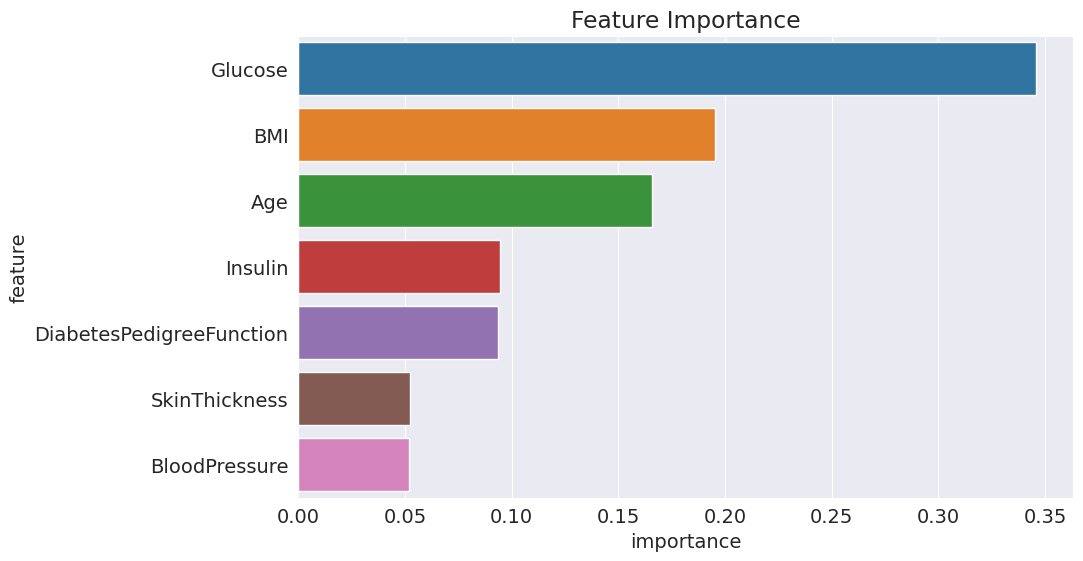

In [99]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

###Gradient Boosting :

In [100]:
#XG Boost Model
from xgboost import XGBClassifier

In [101]:
XG_model=XGBClassifier(random_state=42,n_jobs=-1)

In [102]:
%%time
XG_model.fit(X_train,train_targets)

CPU times: user 1.1 s, sys: 8.31 ms, total: 1.11 s
Wall time: 1.13 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
xg_pred=XG_model.predict(X_train)

In [104]:
accuracy_score(train_targets,xg_pred)

1.0

In [105]:
xg_test_pred=XG_model.predict(X_test)

In [106]:
accuracy_score(test_targets,xg_test_pred)

0.7662337662337663

In [107]:
xg_model=XGBClassifier(n_jobs=-1,random_state=42,learning_rate=0.3,max_depth=5,max_leaves=5,n_estimators=20,max_bin=10, min_child_weight=10,booster='gbtree')

In [108]:
%%time
xg_model.fit(X_train,train_targets)

CPU times: user 33.8 ms, sys: 525 µs, total: 34.3 ms
Wall time: 26.6 ms


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=10,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=5,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [109]:
xg_train_pred=xg_model.predict(X_train)

In [110]:
xg_test_pred=xg_model.predict(X_test)

In [111]:
accuracy_score(train_targets,xg_train_pred),accuracy_score(test_targets,xg_test_pred)

(0.8045602605863192, 0.7922077922077922)

In [112]:
xg_model=XGBClassifier(n_jobs=-1,random_state=42,learning_rate=1,max_depth=6,max_leaves=6,n_estimators=10,max_bin=50, min_child_weight=10,booster='gbtree')
xg_model.fit(X_train,train_targets)
xg_train_pred=xg_model.predict(X_train)
xg_test_pred=xg_model.predict(X_test)
accuracy_score(train_targets,xg_train_pred),accuracy_score(test_targets,xg_test_pred)

(0.8371335504885994, 0.8116883116883117)

In [113]:
xg_train_acc,xg_test_acc=accuracy_score(train_targets,xg_train_pred),accuracy_score(test_targets,xg_test_pred)

In [114]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': xg_model.feature_importances_
}).sort_values('importance', ascending=False)

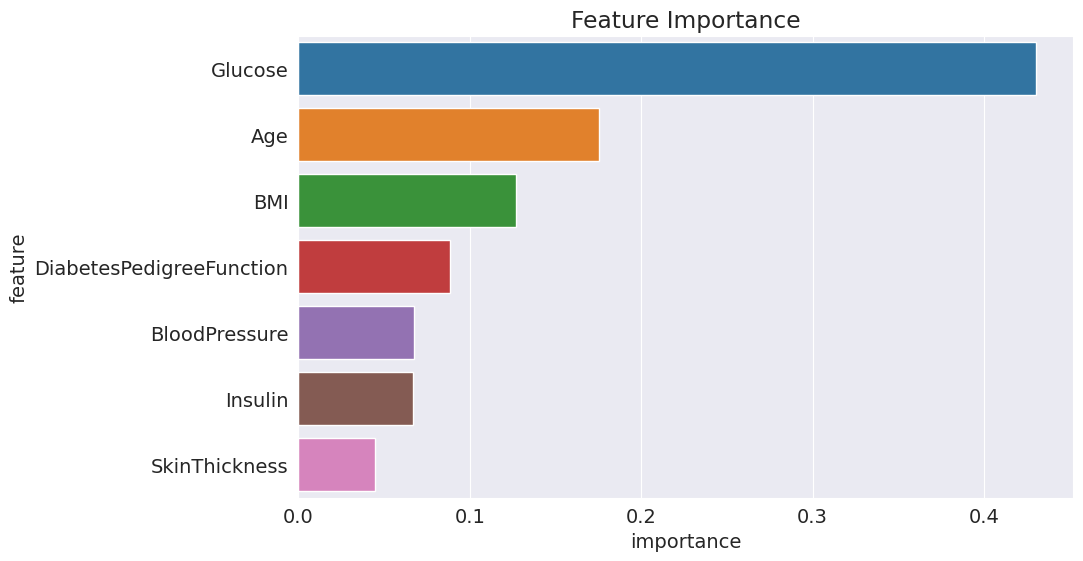

In [115]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

###Comparison Between Models & Selecting Best One :

In [116]:
comparison=pd.DataFrame({
    "Model Name":["Logistic Regression",'Random Forest','Gradient Boosting'],
    "Training Score":[log_train_acc,for_train_acc,xg_train_acc],
    "Test Score":[log_test_acc,for_test_acc,xg_test_acc]
})
comparison

Model Name  Training Score  Test Score
0  Logistic Regression        0.760586    0.779221
1        Random Forest        0.837134    0.785714
2    Gradient Boosting        0.837134    0.811688

From the comaprison it becomes clear that Gradient Boosting is the best model trained on this data.Therefore, we select this model as our final model.

In [117]:
model=XGBClassifier(n_jobs=-1,random_state=42,learning_rate=1,max_depth=6,max_leaves=6,n_estimators=10,max_bin=50, min_child_weight=10,booster='gbtree')
model.fit(X_train,train_targets)
train_pred=xg_model.predict(X_train)
test_pred=xg_model.predict(X_test)
accuracy_score(train_targets,xg_train_pred),accuracy_score(test_targets,xg_test_pred)

(0.8371335504885994, 0.8116883116883117)

##For Custom Data :

In [118]:
raw_df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [119]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [120]:
new_input={'Pregnancies':2,
      'Glucose':200,
      'BloodPressure':100,
      'SkinThickness':30,
      'Insulin':30,
      'BMI':35,
      'DiabetesPedigreeFunction':0.65,
      'Age':50
}

In [121]:
predict_input(model,new_input)

(1, 0.8008771)

From above we can say that our model is working on custom and it is prediting Diabetes as True and is 80% confident about it.

In [122]:
new_input={'Pregnancies':2,
      'Glucose':100,
      'BloodPressure':100,
      'SkinThickness':30,
      'Insulin':30,
      'BMI':35,
      'DiabetesPedigreeFunction':0.65,
      'Age':20
}
predict_input(model,new_input)

(0, 0.97390664)

Now, With decrease in glucose level and Age our model is predicting No diabetes and is 97% sure about it.

##Conclusion :

The following are the conclusion :

1. Dataset is small that's why model is overfitting in first attempt.
2. The Dataset can include data like diet, difficulty in walking,education about diabetes,etc.
3. Our Moadel is giving 81% accuracy that is good in such problems beacuse the bilogical law are not perfect.
4. With increase in dataset our model can reach accurcy of 90%.